In [53]:
#import library
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image

In [54]:
dataset_path = "C:/Users/ASUS/projekakhir/datatomat"

print(os.listdir(dataset_path))

['matangbusuk', 'matangsegar', 'mentahbusuk', 'mentahsegar']


In [55]:
# dataset path directory
dataset_path = "C:/Users/ASUS/projekakhir/datatomat"

# Path for  directory for  training and validation data
base_output_path = "C:/Users/ASUS/projekakhir/split_data"
training_path = os.path.join(base_output_path, "train_data")
validation_path = os.path.join(base_output_path, "val_data")

# List all class in dataset
classes = os.listdir(dataset_path)

# Looping through every class
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)

    # get list file  in each class
    files = os.listdir(class_path)

    # split dataset to training and  validation data, training data(70%) and validation(30%)
    train_files, validation_files = train_test_split(files, test_size=0.1, random_state=42)

    # making new directory
    os.makedirs(os.path.join(training_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_path, class_name), exist_ok=True)
    
    # move file to training data directory
    for file in train_files:
        source_path = os.path.join(class_path, file)
        destination_path = os.path.join(training_path, class_name, file)
        shutil.copyfile(source_path, destination_path)

    # move file to  validation data directory
    for file in validation_files:
        source_path = os.path.join(class_path, file)
        destination_path = os.path.join(validation_path, class_name, file)
        shutil.copyfile(source_path, destination_path)

print("Split  Dataset  to 70% for training and 30% for validation successfully.")

Split  Dataset  to 70% for training and 30% for validation successfully.


In [4]:
#Check data distribution
def count_files_in_directory(directory):
    return len(os.listdir(directory))

def check_data_distribution(training_dir, validation_dir):
    classes_training = os.listdir(training_dir)
    classes_validation = os.listdir(validation_dir)

    print("Data distribution in training directory:")
    for class_name in classes_training:
        class_path = os.path.join(training_dir, class_name)
        num_files = count_files_in_directory(class_path)
        print(f"{class_name}: {num_files} files")

    print("\nData distribution in validation directory:")
    for class_name in classes_validation:
        class_path = os.path.join(validation_dir, class_name)
        num_files = count_files_in_directory(class_path)
        print(f"{class_name}: {num_files} files")

# Replace with the appropriate path
TRAINING_DIR = "C:/Users/ASUS/projekakhir/split_data/train_data"
VALIDATION_DIR = "C:/Users/ASUS/projekakhir/split_data/val_data"

check_data_distribution(TRAINING_DIR, VALIDATION_DIR)

Data distribution in training directory:
matangbusuk: 204 files
matangsegar: 204 files
mentahbusuk: 204 files
mentahsegar: 204 files

Data distribution in validation directory:
matangbusuk: 23 files
matangsegar: 23 files
mentahbusuk: 23 files
mentahsegar: 23 files


In [56]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    TRAINING_DIR = "C:/Users/ASUS/projekakhir/split_data/train_data"
    VALIDATION_DIR = "C:/Users/ASUS/projekakhir/split_data/val_data"

    # NORMALIZE
    training_datagen = ImageDataGenerator(
        rescale=1.0 / 255.0,
        #rotation_range=40,
#        width_shift_range=0.2,
#        height_shift_range=0.2,
#        shear_range=0.2,
#        zoom_range=0.2,
#        horizontal_flip=False,
#        fill_mode='nearest',
        )

    validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # Image size use 64x64 and color mode is grayscale
    # Used "categorical"
    train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                           target_size=(224, 224),
                                                           batch_size=32,
                                                           class_mode='categorical',
                                                           shuffle = True)
    validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical',
                                                                  shuffle = True)
    return train_generator, validation_generator

In [58]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)


Found 816 images belonging to 4 classes.
Found 92 images belonging to 4 classes.


In [21]:
# Loading DenseNet201 model
base_densenet_model = tf.keras.applications.DenseNet201(include_top=False,
                                                        weights='imagenet',
                                                         input_shape=(224,224,3),
                                                        pooling='max')
base_densenet_model.trainable=False
#train_data.preprocessing_function = tf.keras.applications.densenet.preprocess_input
     

In [22]:
# Transfer learning DenseNet201
densenet_model = tf.keras.models.Sequential([
  base_densenet_model,
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

# Compiling model
densenet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )
     

In [26]:
# Melatih model DenseNet201
densenet_hist = densenet_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
26/26 [==============================] - 90s 3s/step - loss: 0.9058 - accuracy: 0.6924 - val_loss: 0.2016 - val_accuracy: 0.9457
Epoch 2/20
26/26 [==============================] - 70s 3s/step - loss: 0.1452 - accuracy: 0.9510 - val_loss: 0.0626 - val_accuracy: 0.9783
Epoch 3/20
26/26 [==============================] - 67s 3s/step - loss: 0.0444 - accuracy: 0.9877 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 4/20
26/26 [==============================] - 67s 3s/step - loss: 0.0551 - accuracy: 0.9767 - val_loss: 0.0805 - val_accuracy: 0.9674
Epoch 5/20
26/26 [==============================] - 67s 3s/step - loss: 0.0246 - accuracy: 0.9926 - val_loss: 0.0208 - val_accuracy: 0.9891
Epoch 6/20
26/26 [==============================] - 68s 3s/step - loss: 0.0160 - accuracy: 0.9963 - val_loss: 0.0337 - val_accuracy: 0.9891
Epoch 7/20
26/26 [==============================] - 70s 3s/step - loss: 0.0142 - accuracy: 0.9963 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 8/20
26/26 [==

In [84]:
densenet_model.save('model_densenettomat.h5')

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


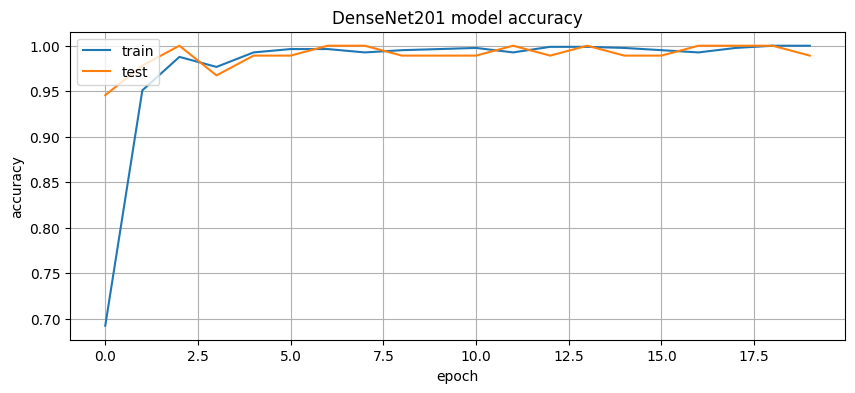

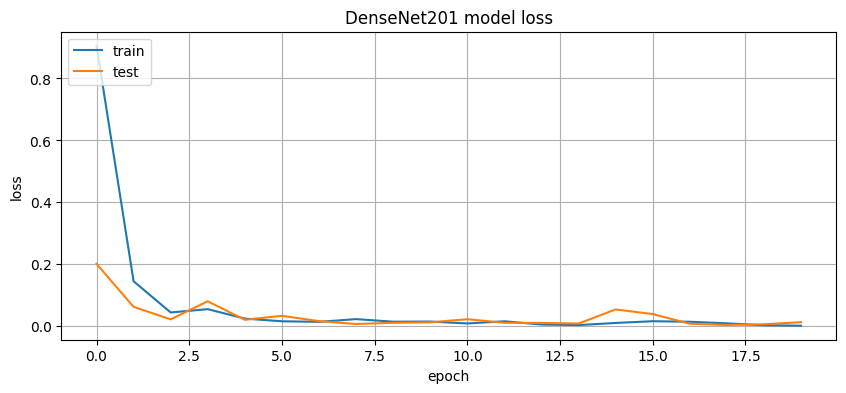

In [30]:
# Membuat plot akurasi model DenseNet201
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('DenseNet201 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model DenseNet201
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['loss'])
plt.plot(densenet_hist.history['val_loss'])
plt.title('DenseNet201 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

1/1 [==============================] - 2s 2s/step
Kualitas tomat: mentahsegar


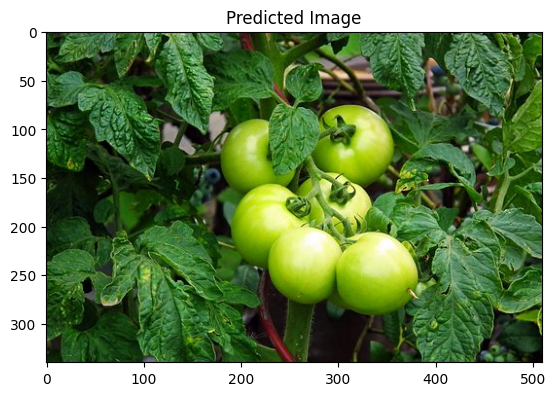

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

def predict_densenet(path):
    # Load the pre-trained DenseNet model
    densenet_model = tf.keras.models.load_model('model_densenettomat.h5')
    
    # Load and preprocess a new image
    img = image.load_img(path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = img / 255.0  # Normalize pixel values (if necessary)
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    
    # Make predictions using the DenseNet model
    predictions = densenet_model.predict(img)
    
    # Interpret the predictions
    predicted_class = np.argmax(predictions)
    
    # Map predicted class to class label (if you have class labels)
    label = ['matangbusuk', 'matangsegar', 'mentahbusuk', 'mentahsegar']
    predicted_class_label = label[predicted_class]
    
    # Print or use the prediction
    print("Kualitas tomat:", predicted_class_label)
    
    # Show predicted Image
    images = cv2.imread(path)
    image_rgb = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title('Predicted Image')
    plt.show()

# Usage example:
image_path = 'C:/Users/ASUS/projekakhir/Validasi/tomatoes-7414760__340.jpg'
predict_densenet(image_path)


1/1 [==============================] - 3s 3s/step


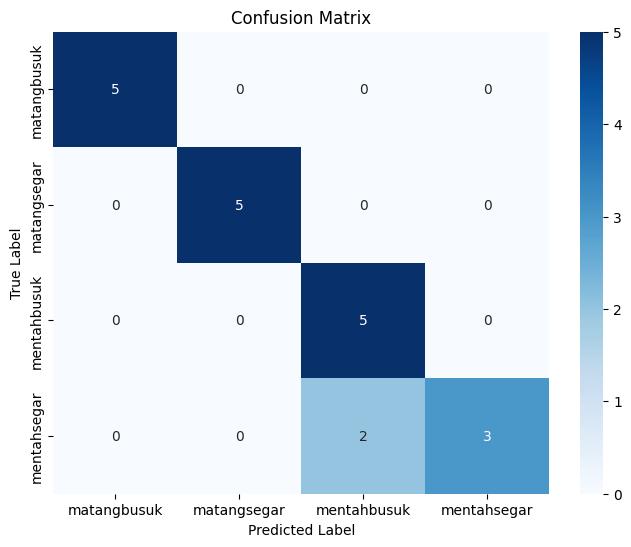


Classification Results :
              precision    recall  f1-score   support

 matangbusuk       1.00      1.00      1.00         5
 matangsegar       1.00      1.00      1.00         5
 mentahbusuk       0.71      1.00      0.83         5
 mentahsegar       1.00      0.60      0.75         5

    accuracy                           0.90        20
   macro avg       0.93      0.90      0.90        20
weighted avg       0.93      0.90      0.90        20



In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Specify the test data folder path
test_data_dir = "C:/Users/ASUS/projekakhir/datatomat"
class_names = sorted(os.listdir(test_data_dir))

# create a function to load and process images
def load_and_process_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    # Normalize to a range of 0-1
    img_array = img_array / 255.0
    return img_array

    
# Function to load test data and labels
def load_test_data(test_dir):
    data = []
    labels = []
    class_mapping = {class_name: i for i, class_name in enumerate(class_names)}  # Encoding kelas

    for class_name in class_names:
        class_path = os.path.join(test_dir, class_name)

        # Add folder existence check
        if not os.path.isdir(class_path):
            print(f"Warning: Folder {class_path} not found.")
            continue

        class_label = class_mapping[class_name]
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:
                img_array = load_and_process_image(image_path)
                data.append(img_array)
                labels.append(class_label)
            except Exception as e:
                print(f"Error loading image {image_path}: {str(e)}")

    return np.array(data), np.array(labels)

# Load model
model = load_model('model_densenettomat.h5')

# Load test data
X_test, y_test = load_test_data(test_data_dir)

# Make predictions using the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test  # As the labels are already in numeric form

# Model evaluation
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
classification_rep = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Show classification report
print("\nClassification Results :")
print(classification_rep)


In [72]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the VGG16 model
base_vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_vgg_model.trainable = False

# Define the preprocessing function
vgg_preprocess = tf.keras.applications.vgg16.preprocess_input

# Assuming you have defined your ImageDataGenerator for training and validation data:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

# Transfer learning with VGG16
vgg_model = tf.keras.models.Sequential([
    base_vgg_model,
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Train the VGG16 model
vgg_hist = vgg_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


Found 816 images belonging to 4 classes.
Found 92 images belonging to 4 classes.
Epoch 1/20
26/26 [==============================] - 59s 2s/step - loss: 1.2957 - accuracy: 0.4669 - val_loss: 0.8503 - val_accuracy: 0.6957
Epoch 2/20
26/26 [==============================] - 53s 2s/step - loss: 0.5959 - accuracy: 0.8002 - val_loss: 0.5726 - val_accuracy: 0.7826
Epoch 3/20
26/26 [==============================] - 53s 2s/step - loss: 0.2840 - accuracy: 0.9179 - val_loss: 0.4809 - val_accuracy: 0.8696
Epoch 4/20
26/26 [==============================] - 53s 2s/step - loss: 0.1538 - accuracy: 0.9571 - val_loss: 0.2687 - val_accuracy: 0.9239
Epoch 5/20
26/26 [==============================] - 71s 3s/step - loss: 0.0839 - accuracy: 0.9828 - val_loss: 0.2013 - val_accuracy: 0.9239
Epoch 6/20
26/26 [==============================] - 71s 3s/step - loss: 0.0571 - accuracy: 0.9890 - val_loss: 0.2739 - val_accuracy: 0.9022
Epoch 7/20
26/26 [==============================] - 71s 3s/step - loss: 0.0383 

In [85]:
vgg_model.save('model_vggtomat.h5')

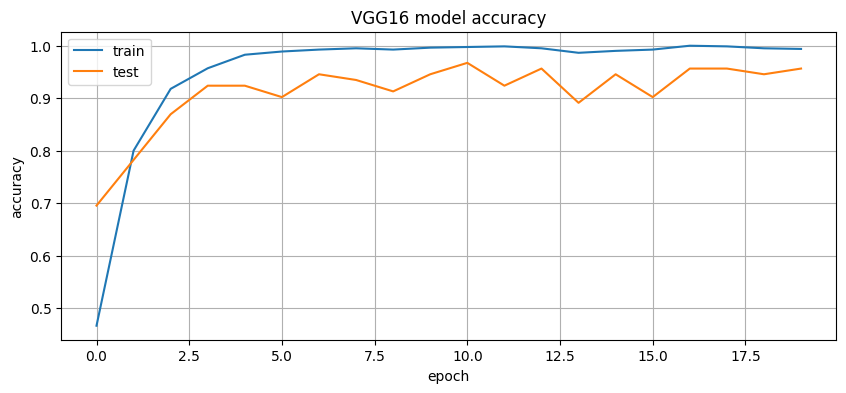

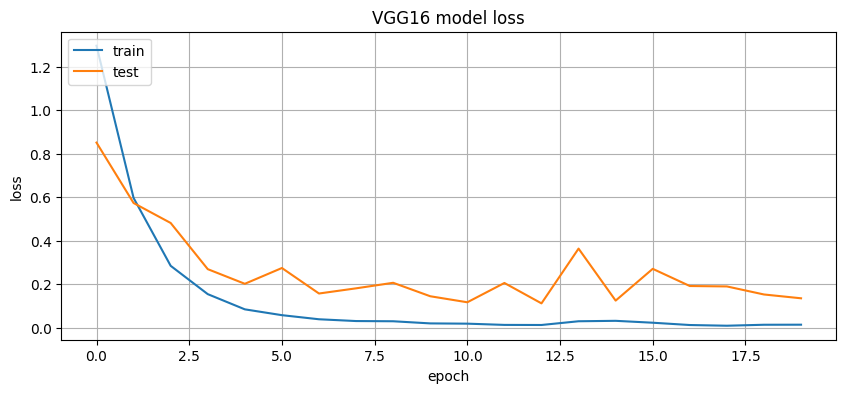

In [74]:
# Membuat plot akurasi model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.title('VGG16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['loss'])
plt.plot(vgg_hist.history['val_loss'])
plt.title('VGG16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 181ms/step
Kualitas tomat: mentahsegar


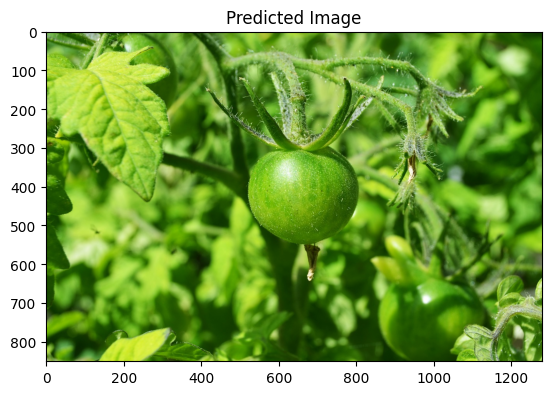

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

def predict_vgg16(path):
    # Load the pre-trained VGG16 model
    vgg_model = tf.keras.models.load_model('model_vggtomat.h5')
    
    # Load and preprocess a new image
    img = image.load_img(path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = img / 255.0  # Normalize pixel values (if necessary)
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    
    # Make predictions using the VGG16 model
    predictions = vgg_model.predict(img)
    
    # Interpret the predictions
    predicted_class = np.argmax(predictions)
    
    # Map predicted class to class label (if you have class labels)
    label = ['matangbusuk', 'matangsegar', 'mentahbusuk', 'mentahsegar']
    predicted_class_label = label[predicted_class]
    
    # Print or use the prediction
    print("Kualitas tomat:", predicted_class_label)
    
    # Show predicted Image
    images = cv2.imread(path)
    image_rgb = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title('Predicted Image')
    plt.show()

# Usage example:
image_path = 'C:/Users/ASUS/projekakhir/Validasi/tomato-8182178_1280.jpg'
predict_vgg16(image_path)


1/1 [==============================] - 1s 1s/step


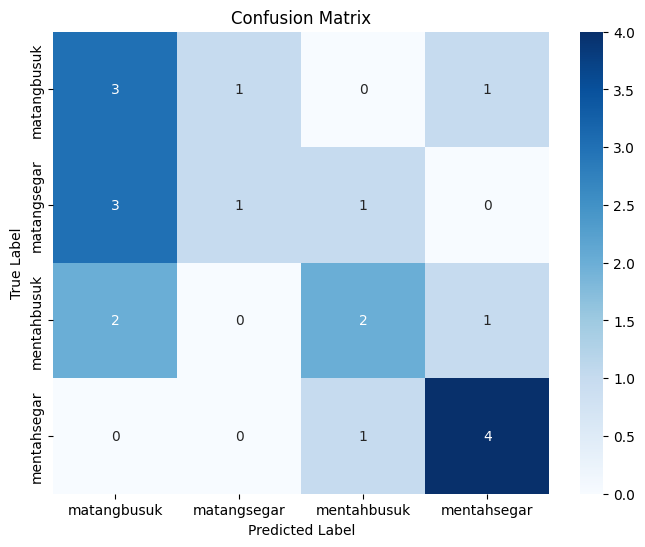


Classification Results :
              precision    recall  f1-score   support

 matangbusuk       0.38      0.60      0.46         5
 matangsegar       0.50      0.20      0.29         5
 mentahbusuk       0.50      0.40      0.44         5
 mentahsegar       0.67      0.80      0.73         5

    accuracy                           0.50        20
   macro avg       0.51      0.50      0.48        20
weighted avg       0.51      0.50      0.48        20



In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Specify the test data folder path
test_data_dir = "C:/Users/ASUS/projekakhir/testing_datatomat"
class_names = sorted(os.listdir(test_data_dir))

# create a function to load and process images
def load_and_process_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    # Normalize to a range of 0-1
    img_array = img_array / 255.0
    return img_array

    
# Function to load test data and labels
def load_test_data(test_dir):
    data = []
    labels = []
    class_mapping = {class_name: i for i, class_name in enumerate(class_names)}  # Encoding kelas

    for class_name in class_names:
        class_path = os.path.join(test_dir, class_name)

        # Add folder existence check
        if not os.path.isdir(class_path):
            print(f"Warning: Folder {class_path} not found.")
            continue

        class_label = class_mapping[class_name]
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:
                img_array = load_and_process_image(image_path)
                data.append(img_array)
                labels.append(class_label)
            except Exception as e:
                print(f"Error loading image {image_path}: {str(e)}")

    return np.array(data), np.array(labels)

# Load model
model = load_model('model_vggtomat.h5')

# Load test data
X_test, y_test = load_test_data(test_data_dir)

# Make predictions using the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test  # As the labels are already in numeric form

# Model evaluation
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
classification_rep = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Show classification report
print("\nClassification Results :")
print(classification_rep)


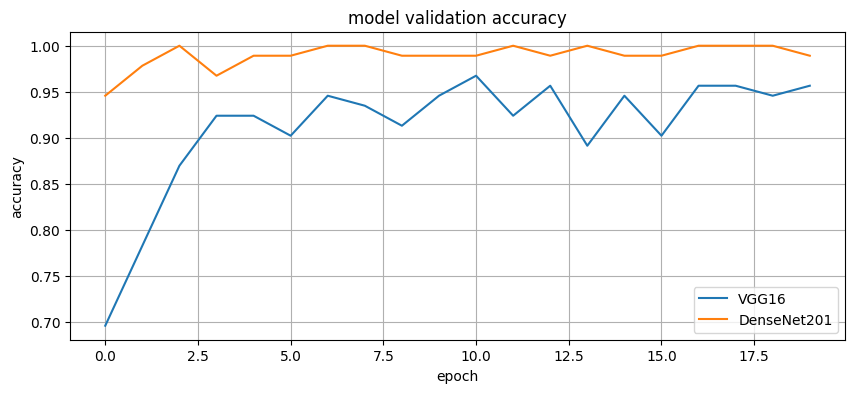

In [83]:
# Membuat plot akurasi dua model sebelumnya untuk dibandingkan
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['val_accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend([ 'VGG16', 'DenseNet201'], loc='lower right')
plt.grid(True)
plt.show()